# Part 1: Preprocessing

In [99]:
import string

text = ""

for filename in ['bible.txt']:
    with open(filename, 'r', encoding = 'utf-8') as file:
        text += file.read() + ' '

# Case folding
text = text.lower()

# Tokenization
def tokenizer(text):
    text = text.translate(str.maketrans('','',string.punctuation))
    token = text.split()
    return token

tokens = tokenizer(text)

In [100]:
# Rank and Freq of terms
rank = []
freq = []

# Calculate term frequency
def calculate_freq(tokens):
    term_freq = {}
    for term in tokens:
        if term in term_freq:
            term_freq[term] += 1
        else:
            term_freq[term] = 1

    # Descending order
    term_freq_desc = sorted(term_freq.items(), key=lambda x: x[1], reverse=True)


    for i in term_freq_desc:
        rank.append(i[0])
        freq.append(i[1])
    return rank and freq

calculate_freq(tokens)

[64306,
 51762,
 34847,
 13680,
 12927,
 12727,
 10421,
 9840,
 8997,
 8997,
 8854,
 8473,
 8234,
 7830,
 7378,
 7030,
 7011,
 6659,
 6624,
 6430,
 6144,
 6059,
 5637,
 5474,
 4600,
 4524,
 4443,
 4420,
 4368,
 4096,
 3999,
 3996,
 3983,
 3932,
 3911,
 3844,
 3826,
 3657,
 3530,
 2973,
 2835,
 2830,
 2776,
 2772,
 2750,
 2688,
 2650,
 2613,
 2565,
 2383,
 2370,
 2301,
 2264,
 2264,
 2169,
 2142,
 2093,
 2026,
 2024,
 2022,
 2015,
 1994,
 1972,
 1968,
 1853,
 1802,
 1800,
 1787,
 1771,
 1734,
 1718,
 1704,
 1690,
 1668,
 1653,
 1617,
 1616,
 1583,
 1511,
 1492,
 1466,
 1456,
 1445,
 1406,
 1404,
 1400,
 1395,
 1385,
 1356,
 1326,
 1262,
 1237,
 1236,
 1228,
 1210,
 1199,
 1179,
 1169,
 1163,
 1125,
 1070,
 1068,
 1065,
 1058,
 1056,
 1043,
 1011,
 1008,
 1006,
 987,
 986,
 983,
 979,
 973,
 971,
 962,
 949,
 938,
 929,
 917,
 916,
 911,
 906,
 896,
 884,
 879,
 874,
 874,
 869,
 863,
 859,
 838,
 835,
 830,
 830,
 812,
 811,
 801,
 784,
 764,
 764,
 755,
 750,
 738,
 725,
 724,
 720,
 7

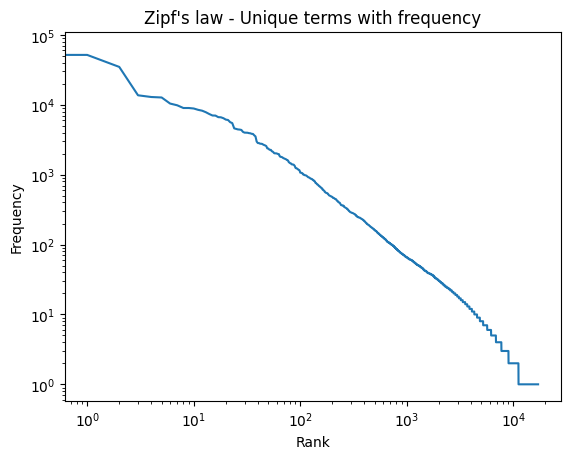

In [101]:
import matplotlib.pyplot as plt

plt.plot(rank, freq)
plt.title("Zipf's law - Unique terms with frequency")
plt.xlabel("Rank")
plt.ylabel("Frequency")

plt.loglog()
plt.show()

In [102]:
# Heap frequency
terms = []
counter = {}
counter_list = []
count = 0
n = 0

for word in tokens:
    if word in counter:
        counter[word] += 1
    else:
        counter[word] = 1
        count += 1
    terms.append(word)
    counter_list.append(count)
    n += 1

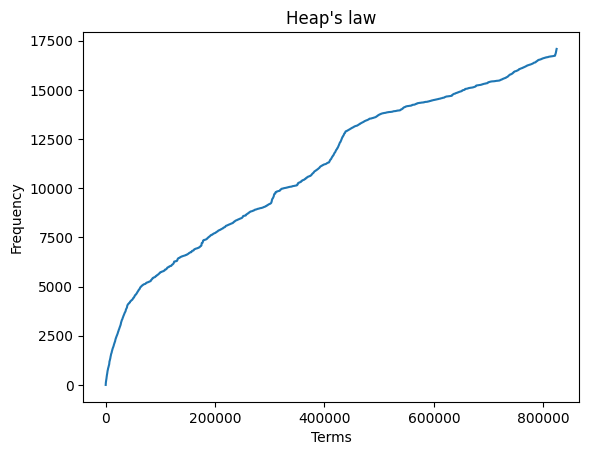

In [103]:
plt.plot(range(0, n), counter_list)

plt.title("Heap's law")
plt.xlabel("Terms")
plt.ylabel("Frequency")


plt.show()

In [104]:
from nltk.stem import PorterStemmer

# Read stopwords from the custom stoplist file
custom_stopwords = set()
with open('stoplist', 'r') as file:
    for line in file:
        word = line.strip()
        custom_stopwords.add(word)

# Stopping - Remove custom stop words
filtered_tokens = []
for word in tokens:
    if word not in custom_stopwords:
        filtered_tokens.append(word)

# Normalization - Perform Porter stemming
porter = PorterStemmer()
stemmed_tokens = []
for word in filtered_tokens:
    stemmed_tokens.append(porter.stem(word))
    
print(stemmed_tokens[:200])

['\ufeffthe', 'project', 'gutenberg', 'ebook', 'king', 'jame', 'version', 'bibl', 'ebook', 'is', 'use', 'anywher', 'unit', 'state', 'most', 'part', 'world', 'cost', 'restrict', 'may', 'copi', 'give', 'reus', 'term', 'project', 'gutenberg', 'licens', 'includ', 'ebook', 'onlin', 'wwwgutenbergorg', 'are', 'locat', 'unit', 'state', 'will', 'check', 'law', 'countri', 'are', 'locat', 'use', 'ebook', 'titl', 'king', 'jame', 'version', 'bibl', 'releas', 'date', 'august', '1', '1989', 'ebook', '10', 'most', 'recent', 'updat', 'may', '1', '2023', 'languag', 'english', 'start', 'project', 'gutenberg', 'ebook', 'king', 'jame', 'version', 'bibl', 'old', 'testament', 'king', 'jame', 'version', 'bibl', 'first', 'book', 'mose', 'call', 'genesi', 'second', 'book', 'mose', 'call', 'exodu', 'third', 'book', 'mose', 'call', 'leviticu', 'fourth', 'book', 'mose', 'call', 'number', 'fifth', 'book', 'mose', 'call', 'deuteronomi', 'book', 'joshua', 'book', 'judg', 'book', 'ruth', 'first', 'book', 'samuel', 'se

In [105]:
# Save preprocessed tokens to new files
with open('bible_preprocessed.txt', 'w', encoding='utf-8') as bible_file:
    bible_file.write(" ".join(stemmed_tokens))

with open('quran_preprocessed.txt', 'w', encoding='utf-8') as quran_file:
    quran_file.write(" ".join(stemmed_tokens))

Compare the processed file to the new file. Are there any surprises? Discuss
what kind of modifications in preprocessing could be applied. For example:
- Additional words/terms to be filtered out
- Special tokenization
- Additional normalization to some terms

In [109]:
new_text = ""

for filename in ['amuzgo.txt']: #, 'maori.txt']:
    with open(filename, 'r', encoding = 'utf-8') as file:
        new_text += file.read() + ' '

# Case folding
text = text.lower()

# Tokenization
new_tokens = tokenizer(new_text)

In [112]:
# Rank and Freq of terms
rank = []
freq = []

# Frequency and sort in Descending order
calculate_freq(new_tokens)

[1360,
 938,
 572,
 342,
 337,
 309,
 290,
 218,
 217,
 213,
 210,
 196,
 187,
 179,
 156,
 142,
 135,
 124,
 122,
 114,
 111,
 105,
 105,
 104,
 102,
 100,
 100,
 100,
 96,
 93,
 92,
 88,
 88,
 85,
 85,
 84,
 83,
 81,
 81,
 79,
 75,
 75,
 74,
 71,
 71,
 68,
 68,
 67,
 66,
 63,
 63,
 62,
 62,
 61,
 60,
 60,
 60,
 57,
 56,
 55,
 55,
 53,
 53,
 52,
 49,
 49,
 49,
 48,
 47,
 47,
 46,
 46,
 46,
 45,
 45,
 44,
 43,
 43,
 42,
 42,
 42,
 41,
 41,
 40,
 40,
 39,
 37,
 37,
 37,
 37,
 36,
 36,
 35,
 35,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 31,
 31,
 31,
 31,
 30,
 30,
 30,
 30,
 29,
 29,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 25,
 25,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 